In [ ]:
from src.utils.fetch_data import fetch_epidemic_data
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

In [ ]:
confirmed, deaths, recovered = fetch_epidemic_data()

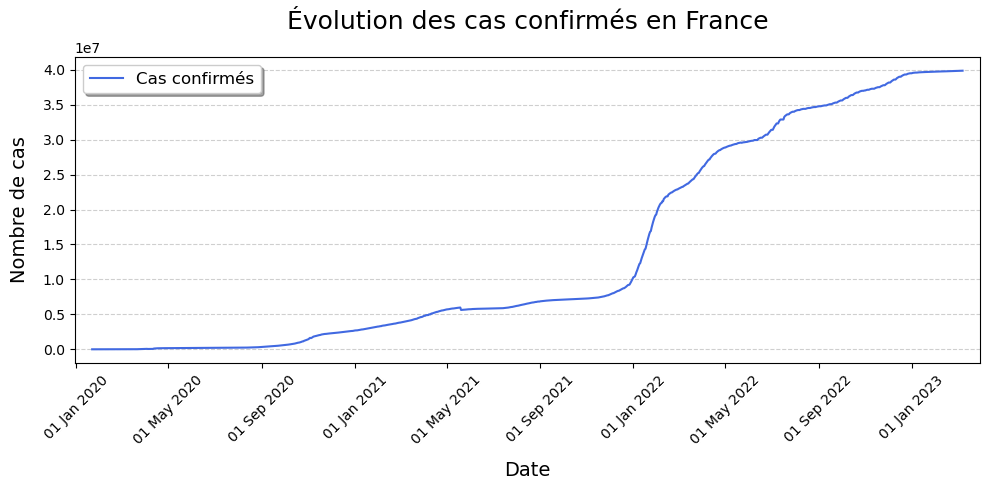

In [ ]:
# Filtrer les données pour la France et agréger les valeurs
france_confirmed = confirmed[confirmed["Country/Region"] == "France"].iloc[:, 4:].sum()

# Conversion de l'index en datetime avec gestion des erreurs
france_confirmed.index = pd.to_datetime(
    france_confirmed.index, format="%m/%d/%y", errors="coerce"
)

# Nettoyage des dates invalides (NaT)
france_confirmed = france_confirmed.loc[france_confirmed.index.notna()]

# Configuration du graphique
plt.figure(figsize=(10, 5))
plt.plot(france_confirmed, color="royalblue", linewidth=1.5, label="Cas confirmés")

# Personnalisation des axes et du titre
plt.title("Évolution des cas confirmés en France", fontsize=18, pad=20)
plt.xlabel("Date", fontsize=14, labelpad=10)
plt.ylabel("Nombre de cas", fontsize=14, labelpad=10)

# Configuration des ticks et format de date
ax = plt.gca()
# Positionnement automatique
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
# Format JJ Mois AAAA
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d %b %Y"))
ax.xaxis.set_tick_params(rotation=45, labelsize=10)

# Ajout de grille et ajustement des marges
ax.yaxis.grid(True, linestyle="--", alpha=0.6)
ax.xaxis.grid(False)
# Réduit les marges horizontales
plt.margins(x=0.02)

# Personnalisation de la légende
plt.legend(loc="upper left", fontsize=12, frameon=True, shadow=True, facecolor="white")

# Ajustement final et affichage
plt.tight_layout()
plt.show()